<a href="https://colab.research.google.com/github/FelipeToroR/Q-learning-DQN/blob/main/Q_learning_Mountain_car_ipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

episode  100 score  -1000.0 epsilon 0.996
episode  200 score  -1000.0 epsilon 0.992
episode  300 score  -1000.0 epsilon 0.988
episode  400 score  -1000.0 epsilon 0.984
episode  500 score  -1000.0 epsilon 0.980
episode  600 score  -1000.0 epsilon 0.976
episode  700 score  -1000.0 epsilon 0.972
episode  800 score  -1000.0 epsilon 0.968
episode  900 score  -1000.0 epsilon 0.964
episode  1000 score  -1000.0 epsilon 0.960
episode  1100 score  -1000.0 epsilon 0.956
episode  1200 score  -1000.0 epsilon 0.952
episode  1300 score  -1000.0 epsilon 0.948
episode  1400 score  -1000.0 epsilon 0.944
episode  1500 score  -1000.0 epsilon 0.940
episode  1600 score  -1000.0 epsilon 0.936
episode  1700 score  -1000.0 epsilon 0.932
episode  1800 score  -1000.0 epsilon 0.928
episode  1900 score  -1000.0 epsilon 0.924
episode  2000 score  -1000.0 epsilon 0.920
episode  2100 score  -1000.0 epsilon 0.916
episode  2200 score  -1000.0 epsilon 0.912
episode  2300 score  -1000.0 epsilon 0.908
episode  2400 score 

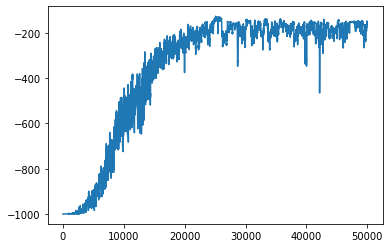

In [ ]:
import gym
import matplotlib.pyplot as plt
import numpy as np
from gym import wrappers
import pickle

pos_space = np.linspace(-1.2, 0.6, 12)
vel_space = np.linspace(-0.07, 0.07, 20)

def get_state(observation):
    pos, vel =  observation
    pos_bin = int(np.digitize(pos, pos_space))
    vel_bin = int(np.digitize(vel, vel_space))

    return (pos_bin, vel_bin)

def max_action(Q, state, actions=[0, 1, 2]):
    values = np.array([Q[state,a] for a in actions])
    action = np.argmax(values)

    return action

if __name__ == '__main__':
    env = gym.make('MountainCar-v0')
    env._max_episode_steps = 1000
    n_games = 50000
    alpha = 0.1
    gamma = 0.99
    eps = 1.0

    action_space = [0, 1, 2]

    states = []
    for pos in range(21):
        for vel in range(21):
            states.append((pos, vel))

    Q = {}
    for state in states:
        for action in action_space:
            Q[state, action] = 0

    score = 0
    total_rewards = np.zeros(n_games)
    for i in range(n_games):
        done = False
        obs = env.reset()
        state = get_state(obs)
        if i % 100 == 0 and i > 0:
            print('episode ', i, 'score ', score, 'epsilon %.3f' % eps)
        score = 0
        while not done:
            action = np.random.choice([0,1,2]) if np.random.random() < eps \
                    else max_action(Q, state)
            obs_, reward, done, info = env.step(action)
            state_ = get_state(obs_)
            score += reward
            action_ = max_action(Q, state_)
            Q[state, action] = Q[state, action] + \
                    alpha*(reward + gamma*Q[state_, action_] - Q[state, action])
            state = state_
        total_rewards[i] = score
        eps = eps - 2/n_games if eps > 0.01 else 0.01

    mean_rewards = np.zeros(n_games)
    for t in range(n_games):
        mean_rewards[t] = np.mean(total_rewards[max(0, t-50):(t+1)])
    plt.plot(mean_rewards)
    plt.savefig('mountaincar.png')
